# Business Hypothesis Testing to Find Employment Status versus Propensity for Term Deposits
Y
ou are working as a data scientist for a bank. You are provided with historical data from the management of the bank and are asked to try to formulate a hypothesis between employment status and the propensity to buy term deposits.

In *Exercise 3.02, Business Hypothesis Testing for Age versus Propensity for a Term Loan* we worked on a problem to find the relationship between age and the propensity to buy term deposits. In this activity, we will use a similar route and verify the relationship between employment status and term deposit purchase propensity.

### Formulate the hypothesis between employment status and the propensity for term deposits. 

Let the hypothesis be as follows: *High paying employees prefer term deposits than other categories of employees*.

In [10]:
# import libraries
import pandas as pd 
import altair as alt 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bankData = pd.read_csv("../bank-full.csv", sep=";")
bankData

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
# occurrence of jobs in sample
jobTot = bankData.groupby('job')['y'].agg(jobTot='count').reset_index()
jobTot

,job,jobTot
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938
9,technician,7597


In [7]:
# occurrence by outcome
jobProp = bankData.groupby(['job', 'y'])['y'].agg(jobCat='count').reset_index()
jobProp

,job,y,jobCat
0,admin.,no,4540
1,admin.,yes,631
2,blue-collar,no,9024
3,blue-collar,yes,708
4,entrepreneur,no,1364
5,entrepreneur,yes,123
6,housemaid,no,1131
7,housemaid,yes,109
8,management,no,8157
9,management,yes,1301


In [9]:
jobComb = pd.merge(jobProp, jobTot, left_on=['job'], right_on=['job'])
jobComb['catProp'] = (jobComb.jobCat / jobComb.jobTot) * 100
jobComb

,job,y,jobCat,jobTot,catProp
0,admin.,no,4540,5171,87.797331
1,admin.,yes,631,5171,12.202669
2,blue-collar,no,9024,9732,92.725031
3,blue-collar,yes,708,9732,7.274969
4,entrepreneur,no,1364,1487,91.728312
5,entrepreneur,yes,123,1487,8.271688
6,housemaid,no,1131,1240,91.209677
7,housemaid,yes,109,1240,8.790323
8,management,no,8157,9458,86.244449
9,management,yes,1301,9458,13.755551


### Visualize

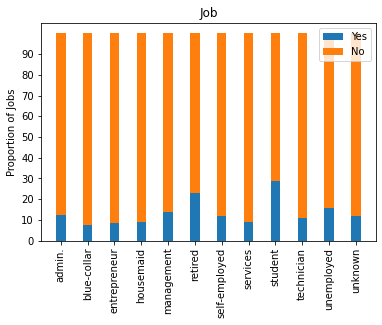

In [19]:
# list of categories
jobList = jobComb['job'].unique()

# Getting two categories ( 'yes','no') for each of jobs
jobYes = jobComb[jobComb['y']=='yes']['catProp']
jobNo = jobComb[jobComb['y']=='no']['catProp']

# Get the length of x axis labels and arranging its indexes
xlabels = len(jobList)
ind = np.arange(xlabels)

# Get width of each bar
width = 0.35
# Getting the plots
p1 = plt.bar(ind, jobYes, width)
p2 = plt.bar(ind, jobNo, width, bottom=jobYes)
# Labels 
plt.ylabel('Proportion of Jobs')
plt.title('Job')
# Label indexes
plt.xticks(ind, jobList)
plt.yticks(np.arange(0, 100, 10))
# Legends
plt.legend((p1[0], p2[0]), ('Yes', 'No'))
# Rotate the axis labels
plt.xticks(rotation=90)

plt.show()

In [28]:
import seaborn as sns

grouped_data = bankData.groupby(['job', 'y']).size()
data_to_plot = grouped_data.unstack()
data_to_plot['total'] = data_to_plot['no'] + data_to_plot['yes']
data_to_plot['no'] = data_to_plot['no'] / data_to_plot['total'] * 100
data_to_plot['yes'] = data_to_plot['yes'] / data_to_plot['total'] * 100
data_to_plot.drop('total', axis=1, inplace=True)
data_to_plot

y,no,yes
job,,
admin.,87.797331,12.202669
blue-collar,92.725031,7.274969
entrepreneur,91.728312,8.271688
housemaid,91.209677,8.790323
management,86.244449,13.755551
retired,77.208481,22.791519
self-employed,88.157061,11.842939
services,91.116996,8.883004
student,71.321962,28.678038


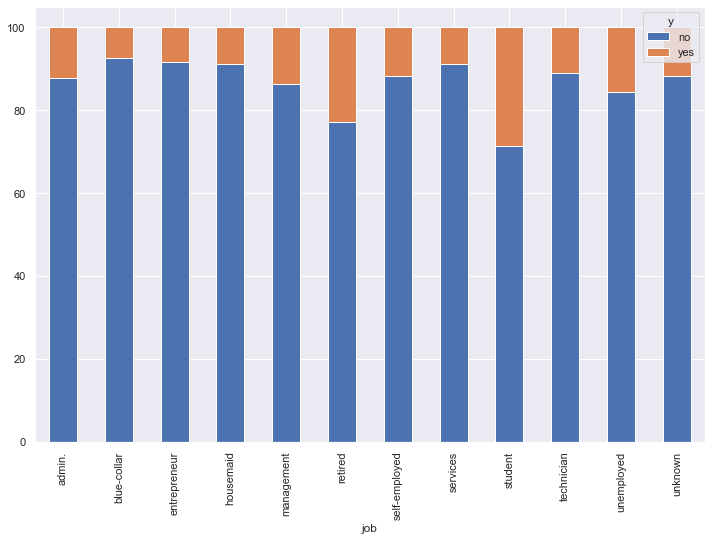

In [29]:
# Plot
sns.set() # indicate that we want to use seaborn as our visualization library
data_to_plot.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12,8)
)
plt.show()